In [1]:
import time

In [2]:
from optibook.synchronous_client import InfoOnly

import logging
logger = logging.getLogger('client')
logger.setLevel('ERROR')

print("Setup was successful.")
e = InfoOnly()
a = e.connect()

2021-01-24 12:50:43,677 [asyncio   ] [MainThread  ] Using selector: EpollSelector


Setup was successful.


In [3]:
import pandas as pd

In [4]:
cols = ["time", "A_bid", "A_ask", "B_bid", "B_ask"]

In [5]:
instruments = ["PHILIPS_A", "PHILIPS_B"]

In [6]:
 e.get_last_price_book(instruments[1])

In [7]:
data = []
while True:
    try:
        tradeticks_a = e.get_last_price_book(instruments[0])
        tradeticks_b = e.get_last_price_book(instruments[1])
        data.append((time.time(), tradeticks_a.bids[0].price, tradeticks_a.asks[0].price, tradeticks_b.bids[0].price, tradeticks_b.asks[0].price))
    except Exception as ex:
        print(ex)
        continue
    time.sleep(0.05)

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out o

KeyboardInterrupt: 

In [8]:
df = pd.DataFrame(data, columns=cols)

In [9]:
df.describe()

,time,A_bid,A_ask,B_bid,B_ask
count,9.730000e+02,973.000000,973.000000,973.000000,973.000000
mean,1.611493e+09,71.936382,72.214183,71.942343,72.167009
std,1.418926e+01,0.199671,0.186378,0.173192,0.219921
min,1.611493e+09,71.500000,71.700000,71.500000,71.900000
25%,1.611493e+09,71.800000,72.000000,71.800000,71.900000
50%,1.611493e+09,71.900000,72.200000,72.000000,72.200000
75%,1.611493e+09,72.100000,72.400000,72.000000,72.300000
max,1.611493e+09,72.300000,72.600000,72.500000,72.600000


In [ ]:
df.to_csv("data.csv")

In [10]:
df = pd.read_csv("data.csv")

In [15]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi']=150

In [16]:
import numpy as np

In [17]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [32]:
from scipy import optimize, stats, constants, interpolate

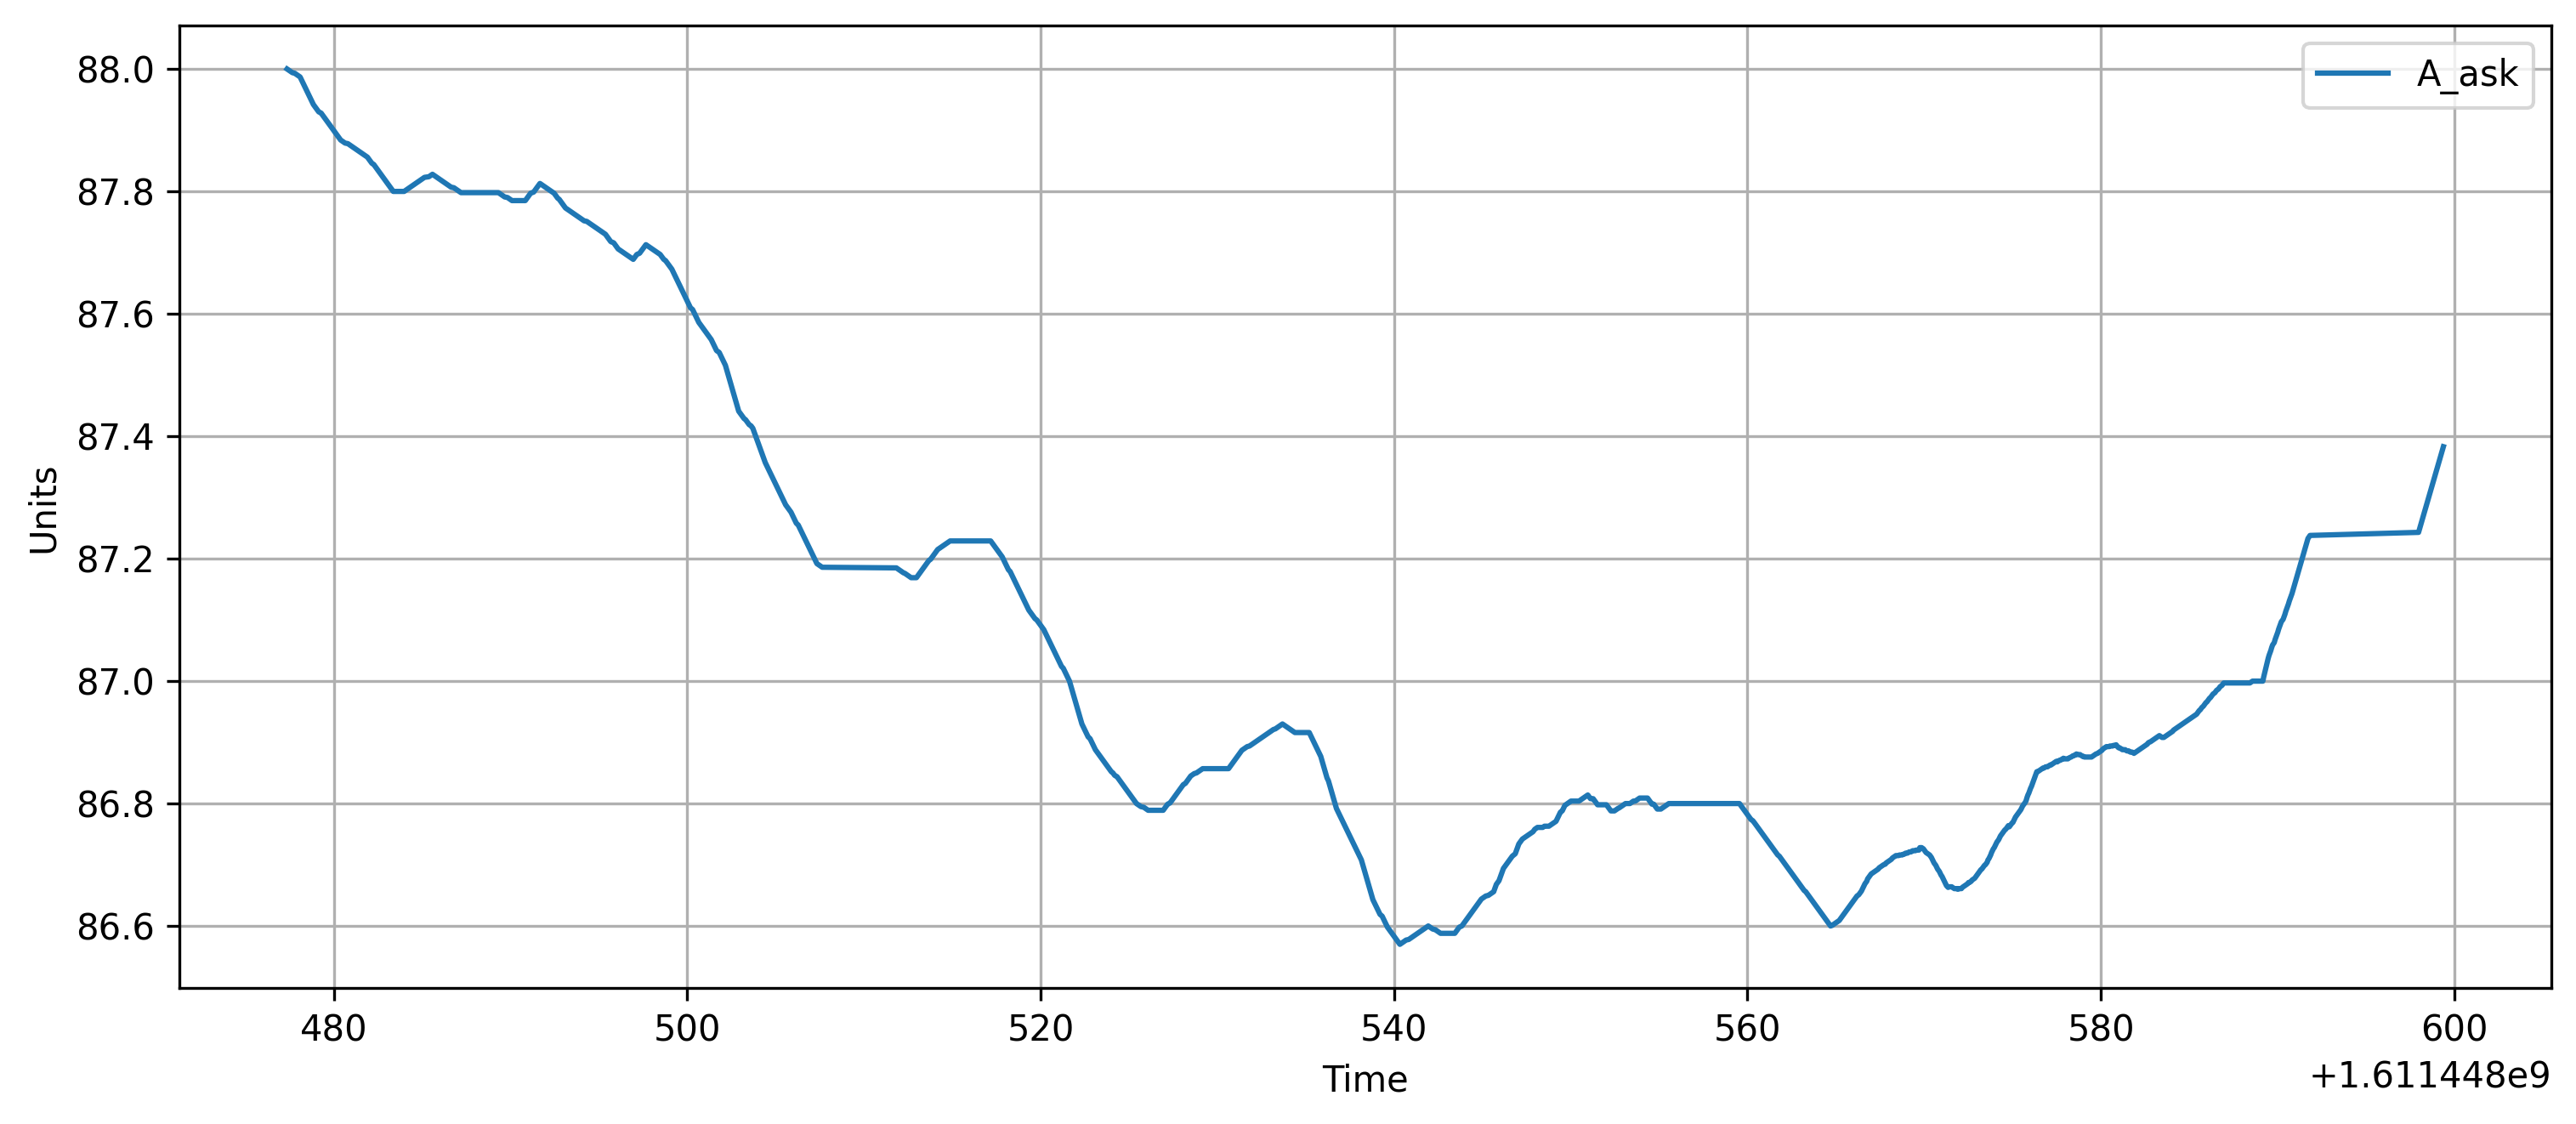

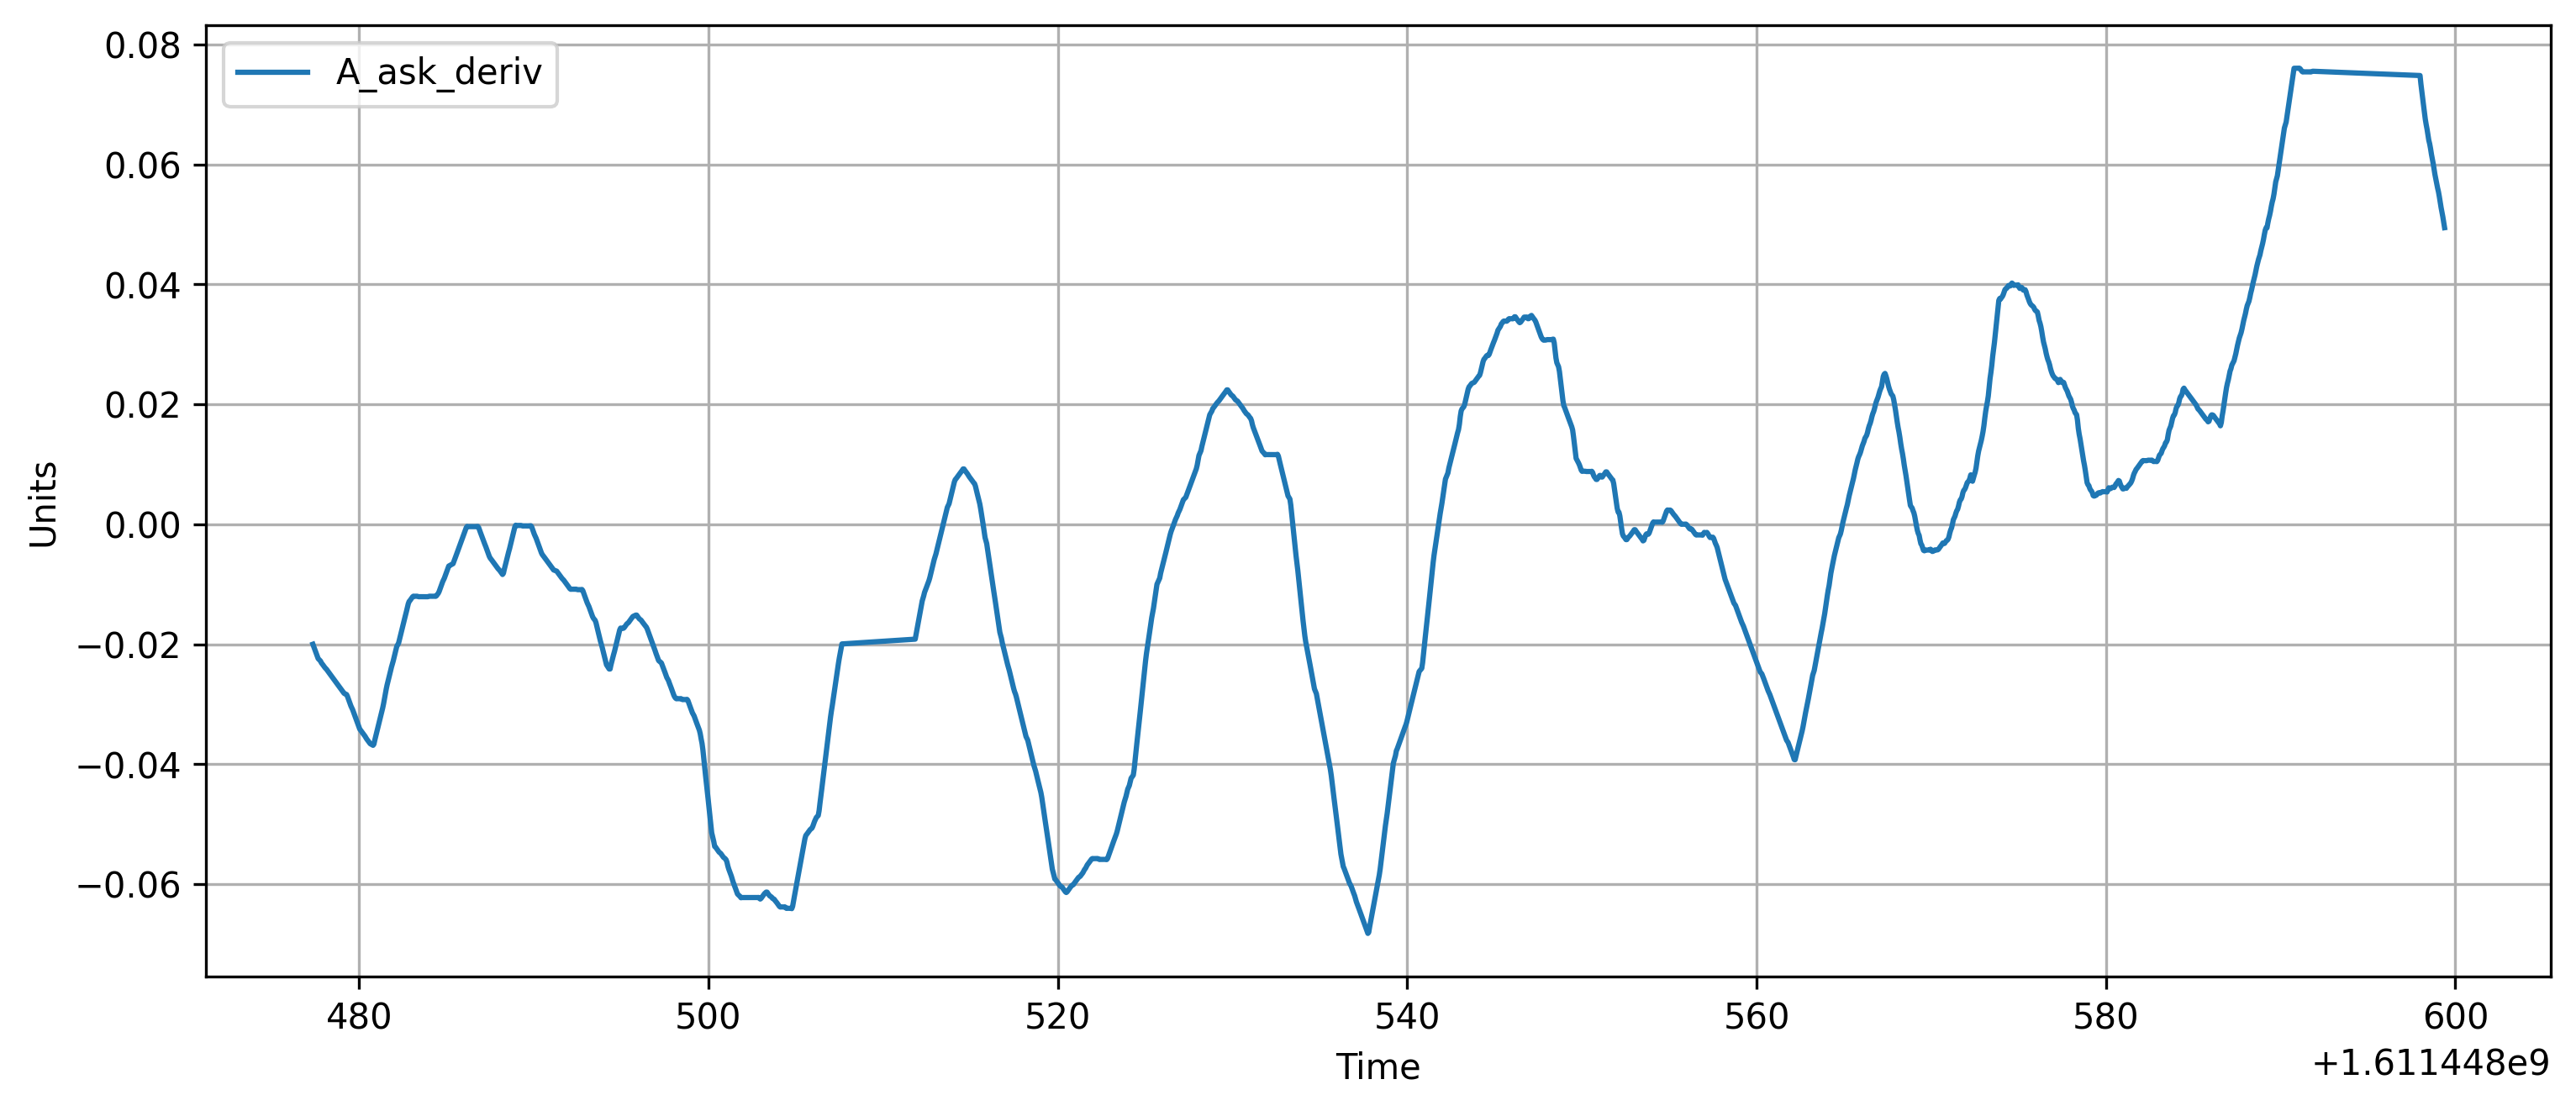

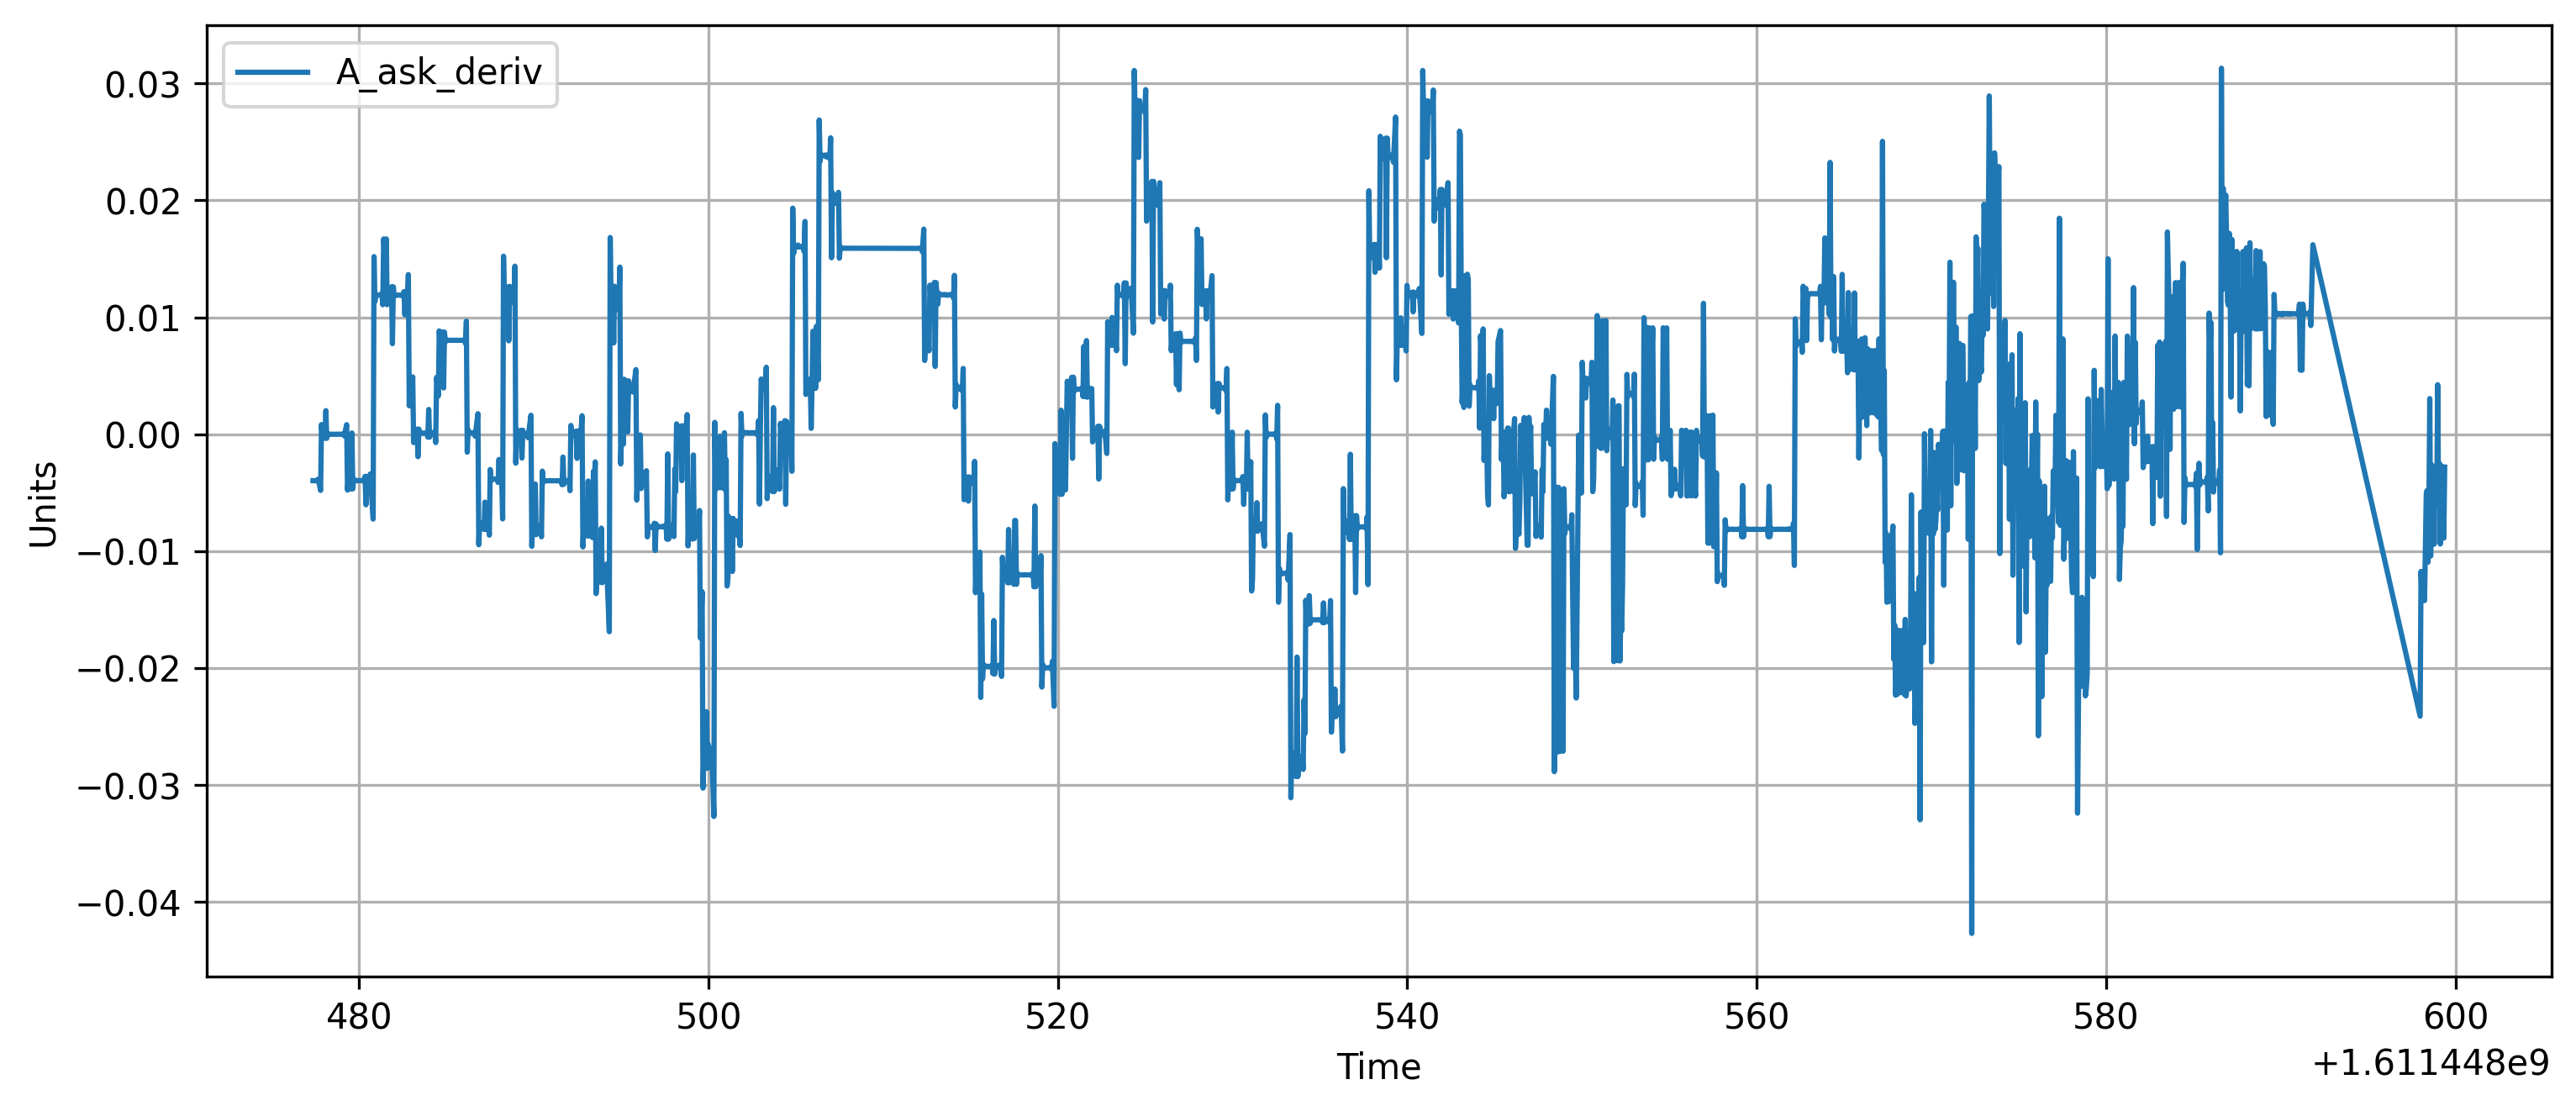

In [52]:
x1 = 50
x2 = -50
factor = 100
def f(y_data):
    # return smooth(x,0)[x1:x2]
    return smooth((interpolate.UnivariateSpline(df["time"][x1:x2], smooth(y_data,factor)[x1:x2], k=2, s=0).derivative())(df["time"][x1:x2]),factor)

def f2(y_data):
    # return smooth(x,0)[x1:x2]
    return smooth((interpolate.UnivariateSpline(df["time"][x1:x2], smooth(y_data,factor)[x1:x2], k=2, s=0).derivative(2))(df["time"][x1:x2]),factor)

plt.figure(figsize=(12, 5))
plt.plot(df["time"][x1:x2], smooth(df["A_ask"],factor)[x1:x2], label='A_ask')
#plt.plot(df["time"][x1:x2], f(df["A_bid"]), label='A_bid')
#plt.plot(df["time"][x1:x2], f(df["B_ask"]), label='B_ask')
#plt.plot(df["time"][x1:x2], f(df["B_bid"]), label='B_bid')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Units')
plt.grid(b=True,which='both')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(df["time"][x1:x2], f(df["A_ask"]), label='A_ask_deriv')
#plt.plot(df["time"][x1:x2], f(df["A_bid"]), label='A_bid')
#plt.plot(df["time"][x1:x2], f(df["B_ask"]), label='B_ask')
#plt.plot(df["time"][x1:x2], f(df["B_bid"]), label='B_bid')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Units')
plt.grid(b=True,which='both')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(df["time"][x1:x2], f2(df["A_ask"]), label='A_ask_deriv')
#plt.plot(df["time"][x1:x2], f(df["A_bid"]), label='A_bid')
#plt.plot(df["time"][x1:x2], f(df["B_ask"]), label='B_ask')
#plt.plot(df["time"][x1:x2], f(df["B_bid"]), label='B_bid')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Units')
plt.grid(b=True,which='both')
plt.show()

In [ ]:
# if the derivative is negative --> decreasing
# if position is < 0 buy/bid
# if derivative is positive --> increasing
# if position is > ask